##  <u> ***Data Modelling***  </u>

In [ ]:
%run 2_DataCleaning&Preperations.ipynb

### ***A.*** <u>***severity as a Target Feature :***</u>

* #### *Define x & y :*

In [2]:
x_severity=df.drop("severity",axis=1)
y_severity=df["severity"]

* #### *Import Needed Libraries :*

In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor,XGBRFRegressor
import warnings
from catboost import CatBoostRegressor
from sklearn.ensemble import (
    AdaBoostRegressor,
    GradientBoostingRegressor,
    RandomForestRegressor,
)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

* #### *Split Data into train and test sets :*

In [39]:
models = {
                "Random Forest": RandomForestRegressor(),
                "Decision Tree": DecisionTreeRegressor(),
                "Gradient Boosting": GradientBoostingRegressor(),
                "Linear Regression": LinearRegression(),
                "XGBRegressor": XGBRegressor(),
                "CatBoosting Regressor": CatBoostRegressor(verbose=False),
                "AdaBoost Regressor": AdaBoostRegressor(),
            }

In [40]:
x_severity=df.drop("severity",axis=1)
y_severity=df["severity"]

xtrain_full,xtest_full, ytrain, ytest = train_test_split(x_severity, y_severity, train_size=0.8, test_size=0.2,random_state=0)

numerical_cols = [col for col in xtrain_full.columns if xtrain_full[col].dtype in ['int64', 'float64']]
categorical_cols =[col for col in xtrain_full.columns if  xtrain_full[col].dtype == "object"]

my_cols = categorical_cols + numerical_cols
xtrain = xtrain_full[my_cols].copy()
xtest = xtest_full[my_cols].copy()

# numerical_transformer = SimpleImputer(strategy='constant')
categorical_transformer = Pipeline(steps=[#('imputer', SimpleImputer(strategy='most_frequent')),
                                          ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        #('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [41]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    

    return mae, rmse, r2_square

In [42]:
model_list = []
r2_list =[]
mae_list=[]
rmse_list=[]


for i in range(len(list(models))):
    model = list(models.values())[i]
    model =my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('melbourne_model', model)# or ('melbourne_model', RandomForestRegressor(random_state=0,n_estimators=50)) 
                             ])
    model.fit(xtrain, ytrain) 

    y_train_pred = model.predict(xtrain)
    y_test_pred = model.predict(xtest)

    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(ytrain, y_train_pred)
    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(ytest, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))
    



    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
   

    r2_list.append(model_test_r2)
    rmse_list.append(model_test_rmse)
    mae_list.append(model_test_mae)
    
    
    print('='*35)
    print('\n')



Random Forest
Model performance for Training set
- Root Mean Squared Error: 715.5136
- Mean Absolute Error: 102.8067
- R2 Score: 0.5123
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1037.4767
- Mean Absolute Error: 142.7595
- R2 Score: -0.0265


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 693.6521
- Mean Absolute Error: 92.2943
- R2 Score: 0.5416
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1156.5313
- Mean Absolute Error: 148.1017
- R2 Score: -0.2756


Gradient Boosting
Model performance for Training set
- Root Mean Squared Error: 882.8837
- Mean Absolute Error: 130.7740
- R2 Score: 0.2574
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 907.1795
- Mean Absolute Error: 130.8661
- R2 Score: 0.2152


Linear Regression
Model performance for Training set
- Root Mean Squared Error: 901.6153
- Mean Absolute Error: 152.0615

In [43]:
pd.DataFrame(list(zip(model_list,rmse_list,mae_list)), 
             columns=['Model Name', 'rmse_Score','mae_Score']).sort_values(by=["mae_Score"],ascending=True)

,Model Name,rmse_Score,mae_Score
2,Gradient Boosting,907.179532,130.866125
5,CatBoosting Regressor,965.445870,139.300505
4,XGBRegressor,1038.961643,140.405629
0,Random Forest,1037.476741,142.759466
1,Decision Tree,1156.531293,148.101724
3,Linear Regression,906.277999,150.652791
6,AdaBoost Regressor,1437.649249,293.115418


In [44]:
Gradient_Boosting_model = GradientBoostingRegressor()
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('melbourne_model', Gradient_Boosting_model)# or ('melbourne_model', RandomForestRegressor(random_state=0,n_estimators=50)) 
                             ])
my_pipeline.fit(xtrain, ytrain)
preds = my_pipeline.predict(xtest)
score = mean_absolute_error(ytest, preds)
print('MAE:', score)
score = r2_score(ytest, preds)*100
print(" Accuracy of the model is %.2f" %score)

MAE: 130.86612518276817
 Accuracy of the model is 21.52


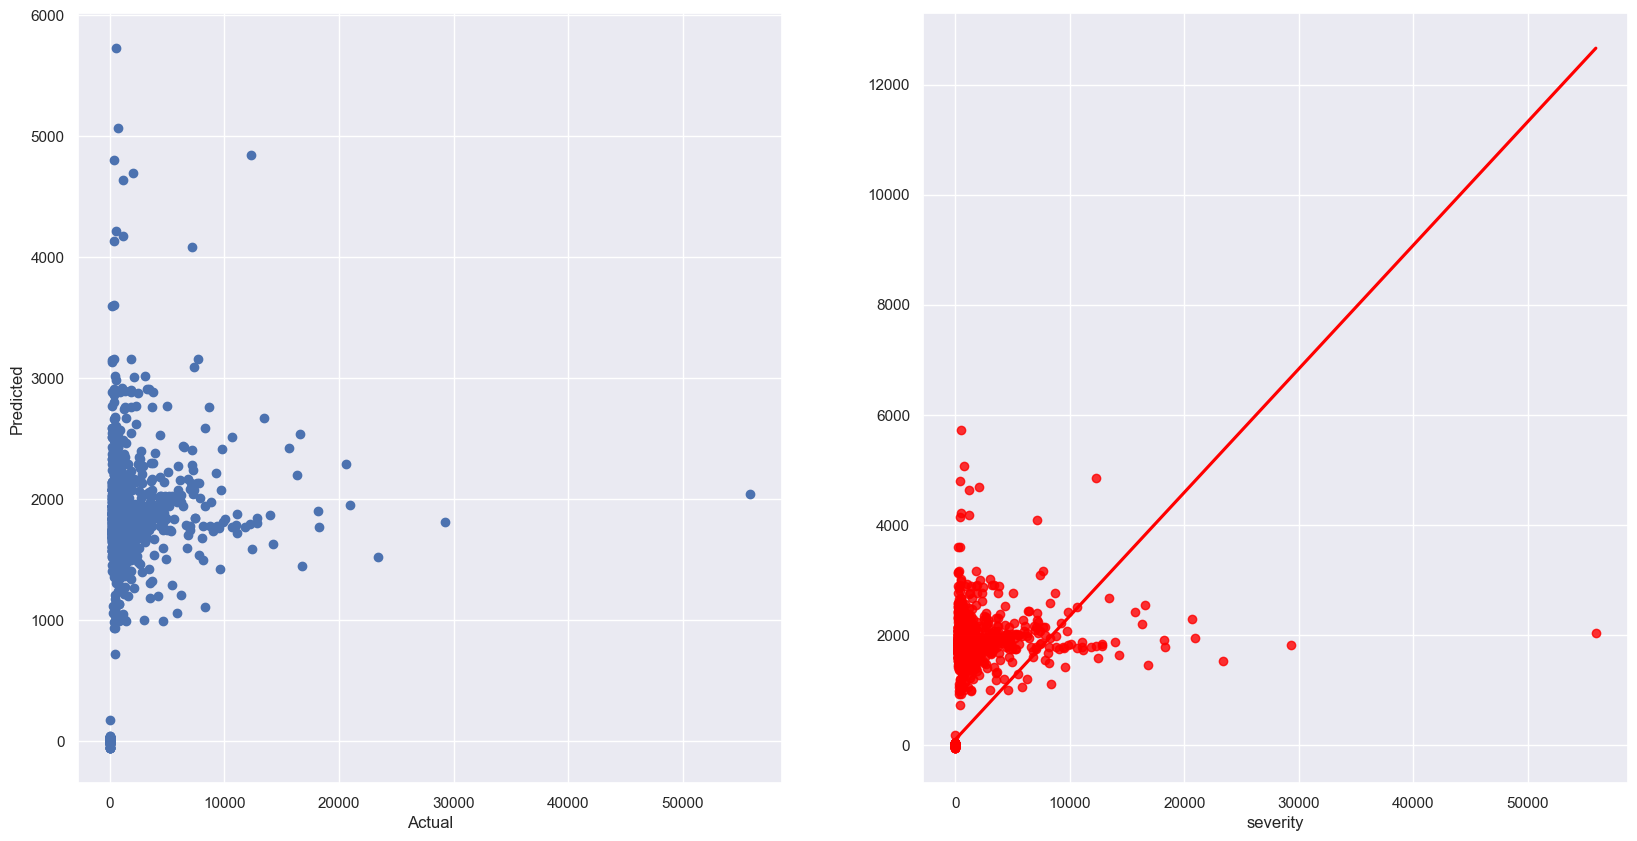

In [45]:
plt.subplot(121)
plt.scatter(ytest,preds);
plt.xlabel('Actual');
plt.ylabel('Predicted');

plt.subplot(122)
sns.regplot(x=ytest,y=preds,ci=None,color ='red');


In [46]:
pred_df=pd.DataFrame({'Actual Value':ytest,'Predicted Value':preds,'Difference':ytest-preds})
pred_df

,Actual Value,Predicted Value,Difference
38919,0.0,1.081423,-1.081423
16249,0.0,-0.658599,0.658599
63426,0.0,-1.219122,1.219122
57126,0.0,2.098763,-2.098763
51108,0.0,1.195697,-1.195697
...,...,...,...
42290,0.0,0.027137,-0.027137
3769,0.0,-1.219122,1.219122
24202,0.0,-2.231016,2.231016
27299,0.0,-0.939050,0.939050


---

### ***A.*** <u>***Frequency as a Target Feature :***</u>

* #### *Define x & y :*

In [47]:
x_frequincy=df.drop("frequincy",axis=1)
y_frequincy=df["frequincy"]

xtrain_full,xtest_full, ytrain, ytest = train_test_split(x_frequincy, y_frequincy, train_size=0.8, test_size=0.2,random_state=0)

numerical_cols = [col for col in xtrain_full.columns if xtrain_full[col].dtype in ['int64', 'float64']]
categorical_cols =[col for col in xtrain_full.columns if  xtrain_full[col].dtype == "object"]

my_cols = categorical_cols + numerical_cols
xtrain = xtrain_full[my_cols].copy()
xtest = xtest_full[my_cols].copy()

# numerical_transformer = SimpleImputer(strategy='constant')
categorical_transformer = Pipeline(steps=[#('imputer', SimpleImputer(strategy='most_frequent')),
                                          ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        #('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [48]:
model_list = []
r2_list =[]
mae_list=[]
rmse_list=[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model =my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('melbourne_model', model)# or ('melbourne_model', RandomForestRegressor(random_state=0,n_estimators=50)) 
                             ])
    model.fit(xtrain, ytrain) 

    y_train_pred = model.predict(xtrain)
    y_test_pred = model.predict(xtest)

    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(ytrain, y_train_pred)
    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(ytest, y_test_pred)


    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    rmse_list.append(model_test_rmse)
    mae_list.append(model_test_mae)
    
    print('='*35)
    print('\n')



Random Forest
Model performance for Training set
- Root Mean Squared Error: 2.3592
- Mean Absolute Error: 0.1492
- R2 Score: 0.4238
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2.4308
- Mean Absolute Error: 0.1613
- R2 Score: -1.0786


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 2.2392
- Mean Absolute Error: 0.1340
- R2 Score: 0.4809
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3.4888
- Mean Absolute Error: 0.1720
- R2 Score: -3.2818


Gradient Boosting
Model performance for Training set
- Root Mean Squared Error: 2.9650
- Mean Absolute Error: 0.1886
- R2 Score: 0.0898
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.5435
- Mean Absolute Error: 0.1616
- R2 Score: 0.1619


Linear Regression
Model performance for Training set
- Root Mean Squared Error: 2.9983
- Mean Absolute Error: 0.2250
- R2 Score: 0.0692
---------

In [49]:
pd.DataFrame(list(zip(model_list,rmse_list,mae_list)), 
             columns=['Model Name', 'rmse_Score','mae_Score']).sort_values(by=["mae_Score"],ascending=True)

,Model Name,rmse_Score,mae_Score
0,Random Forest,2.430799,0.161295
2,Gradient Boosting,1.543546,0.161570
1,Decision Tree,3.488835,0.172007
4,XGBRegressor,3.373916,0.174882
5,CatBoosting Regressor,3.221000,0.178402
3,Linear Regression,1.536994,0.195742
6,AdaBoost Regressor,3.227847,0.494004


In [50]:
RandomForestRegressor_model =RandomForestRegressor()
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('melbourne_model', RandomForestRegressor_model)# or ('melbourne_model', RandomForestRegressor(random_state=0,n_estimators=50)) 
                             ])
my_pipeline.fit(xtrain, ytrain)
preds = my_pipeline.predict(xtest)
score = mean_absolute_error(ytest, preds)
print('MAE:', score)
score = r2_score(ytest, preds)*100
print(" Accuracy of the model is %.2f" %score)

MAE: 0.15840084706067742
 Accuracy of the model is -98.67


In [25]:
# Evaluate the model
score = mean_absolute_error(ytest, preds)
print('MAE:', score)

scores = -1 * cross_val_score(my_pipeline, xtrain, ytrain,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

print("Average MAE score (across experiments):")
print(scores.mean())

MAE: 0.1601937593195841
MAE scores:
 [0.17612782 0.24554908 0.20444694 0.18758632 0.21595266]
Average MAE score (across experiments):
0.20593256393625467


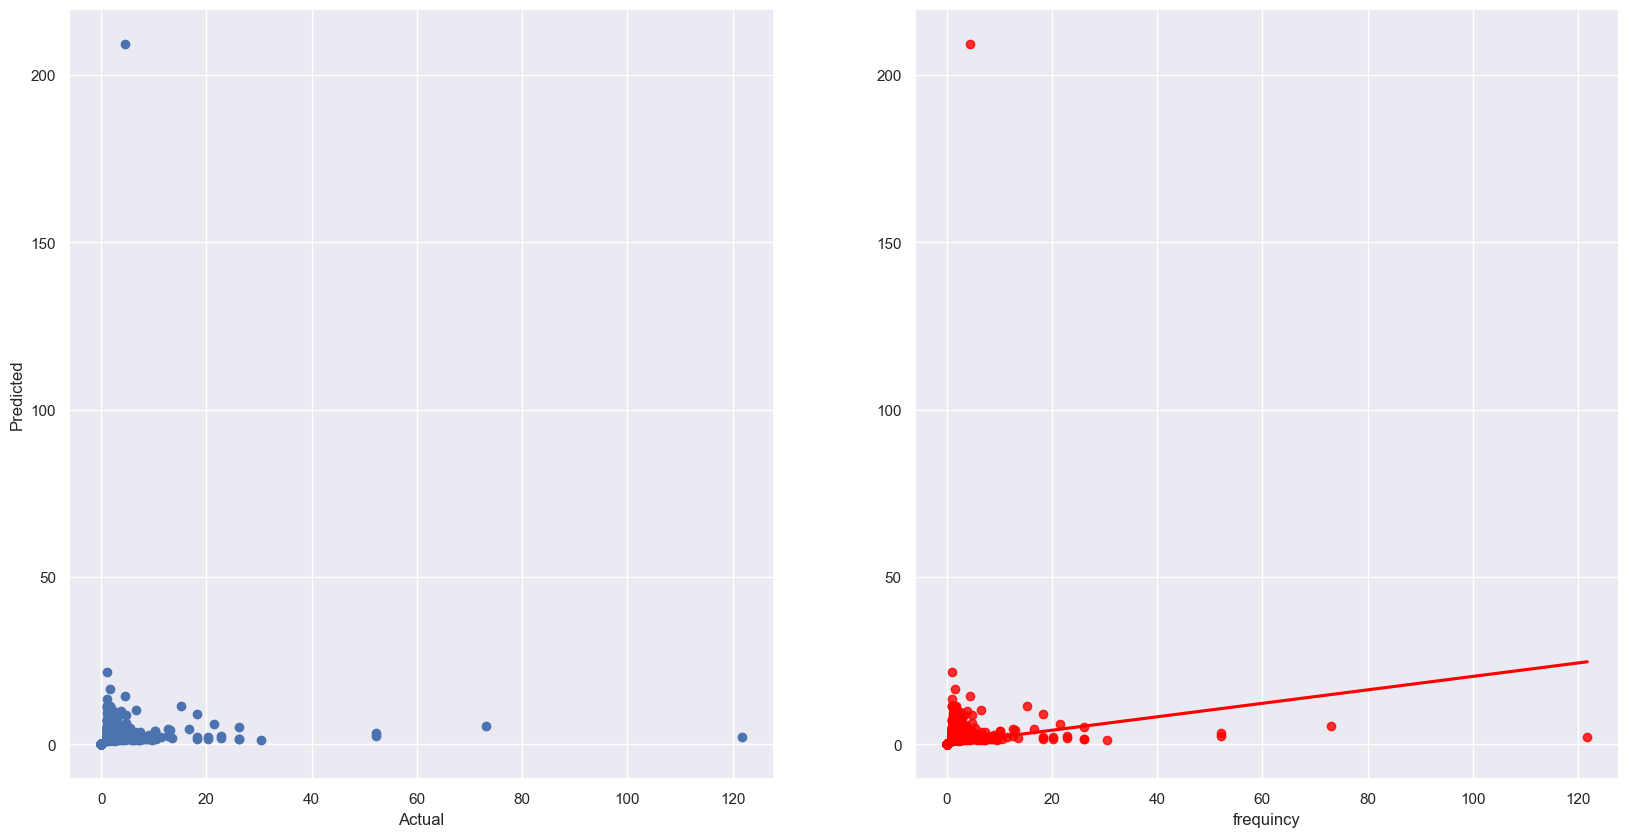

In [51]:
plt.subplot(121)
plt.scatter(ytest,preds);
plt.xlabel('Actual');
plt.ylabel('Predicted');

plt.subplot(122)
sns.regplot(x=ytest,y=preds,ci=None,color ='red');

In [54]:
pred_df=pd.DataFrame({'Actual Value':ytest,'Predicted Value':preds,'Difference':ytest-preds})
pred_df

,Actual Value,Predicted Value,Difference
38919,0.0,0.0,0.0
16249,0.0,0.0,0.0
63426,0.0,0.0,0.0
57126,0.0,0.0,0.0
51108,0.0,0.0,0.0
...,...,...,...
42290,0.0,0.0,0.0
3769,0.0,0.0,0.0
24202,0.0,0.0,0.0
27299,0.0,0.0,0.0


---

## ***Classifications***

In [250]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.metrics import (
    mean_absolute_error,mean_squared_error, r2_score,accuracy_score,roc_auc_score,auc,roc_curve,precision_score,
    recall_score,f1_score
    )

from sklearn.svm import SVR,SVC
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from catboost import CatBoostRegressor,CatBoostClassifier
from xgboost import XGBRegressor,XGBRFRegressor,XGBClassifier,XGBRFClassifier
import warnings
from catboost import CatBoostRegressor,CatBoostClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingRegressor,
    RandomForestClassifier,
    GradientBoostingClassifier
)


In [251]:
models = {
                "Random Forest": RandomForestClassifier(),
                "Decision Tree": DecisionTreeClassifier(),
                "Gradient Boosting": GradientBoostingClassifier(),
                "XGBRegressor": XGBClassifier(),
                "CatBoosting Regressor": CatBoostClassifier(verbose=False),
                "AdaBoost Regressor": AdaBoostClassifier(),
            }

In [252]:
def Cat_evaluate_model(true, predicted):
    AccuracyScore = accuracy_score(true, predicted)
    
    return AccuracyScore



In [253]:
categorical_transformer = Pipeline(steps=[
                                          ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        #('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [254]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder_cat = LabelEncoder()

In [255]:
df_gender=df.copy()
df_gender["gender"]=LabelEncoder_cat.fit_transform(df_gender["gender"])

In [256]:
df_gender

,veh_value,exposure,clm,numclaims,claimcst0,veh_body,veh_age,gender,area,agecat,severity,frequincy
0,1.06,0.303901,0,0,0.000000,HBACK,3,0,C,2,0.0,0.00
1,1.03,0.648871,0,0,0.000000,HBACK,2,0,A,4,0.0,0.00
2,3.26,0.569473,0,0,0.000000,UTE,2,0,E,2,0.0,0.00
3,4.14,0.317591,0,0,0.000000,STNWG,2,0,D,2,0.0,0.00
4,0.72,0.648871,0,0,0.000000,HBACK,4,0,C,2,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
67851,1.07,0.654346,0,0,0.000000,SEDAN,2,1,A,6,0.0,0.00
67852,1.23,0.908966,0,0,0.000000,SEDAN,4,1,C,3,0.0,0.00
67853,1.93,0.312115,0,0,0.000000,STNWG,4,1,C,3,0.0,0.00
67854,0.97,0.320329,1,1,7646.769989,HBACK,3,0,C,2,7647.0,3.12


In [257]:
x_gender=df_gender.drop("gender",axis=1)
y_gender= df_gender["gender"]


xtrain_full,xtest_full, ytrain, ytest = train_test_split(x_gender, y_gender, train_size=0.8, test_size=0.2,random_state=0)

numerical_cols = [col for col in xtrain_full.columns if xtrain_full[col].dtype in ['int64', 'float64']]
categorical_cols =[col for col in xtrain_full.columns if  xtrain_full[col].dtype == "object"]

my_cols = categorical_cols + numerical_cols
xtrain = xtrain_full[my_cols].copy()
xtest = xtest_full[my_cols].copy()

# numerical_transformer = SimpleImputer(strategy='constant')
categorical_transformer = Pipeline(steps=[#('imputer', SimpleImputer(strategy='most_frequent')),
                                          ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        #('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [258]:
#model_list = []
accurecy_list =[]
#mae_list=[]
#aucScore_list=[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model =my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('melbourne_model', model)# or ('melbourne_model', RandomForestRegressor(random_state=0,n_estimators=50)) 
                             ])
    model.fit(xtrain, ytrain) 

    y_train_pred = model.predict(xtrain)
    y_test_pred = model.predict(xtest)

    model_train_AccuracyScore = Cat_evaluate_model(ytrain, y_train_pred)
    model_test_AccuracyScore = Cat_evaluate_model(ytest, y_test_pred)


    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy Score: {:.4f}".format(model_train_AccuracyScore))
    


    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Accuracy Score: {:.4f}".format(model_test_AccuracyScore))
   
 
    accurecy_list.append(model_test_AccuracyScore)
    #aucScore_list.append(model_test_aucScore)
    #mae_list.append(model_test_mae)
    
    print('='*35)
    print('\n')



Random Forest
Model performance for Training set
- Accuracy Score: 0.6559
----------------------------------
Model performance for Test set
- Accuracy Score: 0.6297


Decision Tree
Model performance for Training set
- Accuracy Score: 0.6560
----------------------------------
Model performance for Test set
- Accuracy Score: 0.6266


Gradient Boosting
Model performance for Training set
- Accuracy Score: 0.6439
----------------------------------
Model performance for Test set
- Accuracy Score: 0.6357


XGBRegressor
Model performance for Training set
- Accuracy Score: 0.6505
----------------------------------
Model performance for Test set
- Accuracy Score: 0.6336


CatBoosting Regressor
Model performance for Training set
- Accuracy Score: 0.6523
----------------------------------
Model performance for Test set
- Accuracy Score: 0.6358


AdaBoost Regressor
Model performance for Training set
- Accuracy Score: 0.6390
----------------------------------
Model performance for Test set
- Accurac

In [259]:
pd.DataFrame(list(zip(model_list,accurecy_list)), 
             columns=['Model Name', 'accurecy']).sort_values(by=["accurecy"],ascending=True)

,Model Name,accurecy
1,Decision Tree,0.626584
0,Random Forest,0.629679
5,AdaBoost Regressor,0.631152
3,XGBRegressor,0.633584
2,Gradient Boosting,0.635721
4,CatBoosting Regressor,0.635794


In [260]:
model =my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('melbourne_model', DecisionTreeClassifier())# or ('melbourne_model', RandomForestRegressor(random_state=0,n_estimators=50)) 
                             ])
model.fit(xtrain, ytrain) 


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['clm', 'numclaims',
                                                   'veh_body', 'veh_age',
                                                   'area', 'agecat'])])),
                ('melbourne_model', DecisionTreeClassifier())])

In [ ]:
#Precision is a ratio of the number of true positives divided by the sum of the true positives and false positives.
#It describes how good a model is at predicting the positive class. Precision is referred to as the positive predictive value.

#Recall is calculated as the ratio of the number of true positives divided by the sum of the true positives and the false negatives.
#Recall is the same as sensitivity.

# True Positive Rate = True Positives / (True Positives + False Negatives)  sensitivity==Recall
# False Positive Rate = False Positives / (False Positives + True Negatives) Specificity where : False Positive Rate = (1 - Specificity)
# Positive Predictive Power = True Positives / (True Positives + False Positives) Precision

In [261]:
print("Accuracy of DT_Model: ",
      accuracy_score(ytest, model.predict(xtest)))
# print other performance metrics
print("Precision of DT_Model: ", 
      precision_score(ytest, model.predict(xtest), average='weighted'))
print("Recall of DT_Model: ",
      recall_score(ytest, model.predict(xtest), average='weighted'))
print("F1-Score of DT_Model: ",
      f1_score(ytest, model.predict(xtest), average='weighted'))

Accuracy of DT_Model:  0.6264367816091954
Precision of DT_Model:  0.6233585610736694
Recall of DT_Model:  0.6264367816091954
F1-Score of DT_Model:  0.6060054261277892


In [262]:
from sklearn.metrics import (
    precision_recall_curve,
    classification_report,RocCurveDisplay,
    confusion_matrix,f1_score,ConfusionMatrixDisplay
    )
import pandas as pd
import seaborn as sns

In [263]:
from sklearn.utils.multiclass import unique_labels
import pandas as pd
unique_labels(ytest)
labels=unique_labels(ytest)
col_names=[f"predicted{label}"for label in labels ]
index_names=[f"Actual{label}"for label in labels ]
pd.DataFrame(confusion_matrix(ytest, model.predict(xtest)),columns=col_names,index=index_names)

,predicted0,predicted1
Actual0,6279,1404
Actual1,3666,2223


<Axes: >

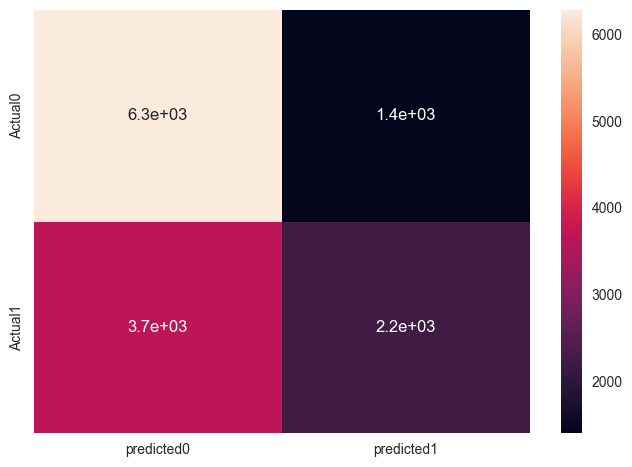

In [264]:

sns.heatmap(data=pd.DataFrame(confusion_matrix(ytest, model.predict(xtest)),columns=col_names,index=index_names),annot=True)

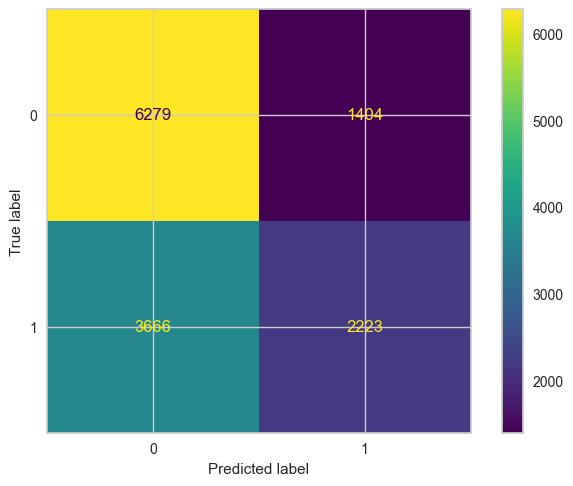

In [265]:
ConfusionMatrixDisplay(confusion_matrix(ytest, model.predict(xtest))).plot();

In [267]:
print(classification_report(ytest, model.predict(xtest)))

              precision    recall  f1-score   support

           0       0.63      0.82      0.71      7683
           1       0.61      0.38      0.47      5889

    accuracy                           0.63     13572
   macro avg       0.62      0.60      0.59     13572
weighted avg       0.62      0.63      0.61     13572



In [268]:
from yellowbrick.classifier import ClassificationReport
classes = ["Male", "Femle"]
visualizer = ClassificationReport(DecisionTreeClassifier(), classes=classes, support=True)



AttributeError: 'Pipeline' object has no attribute 'show'

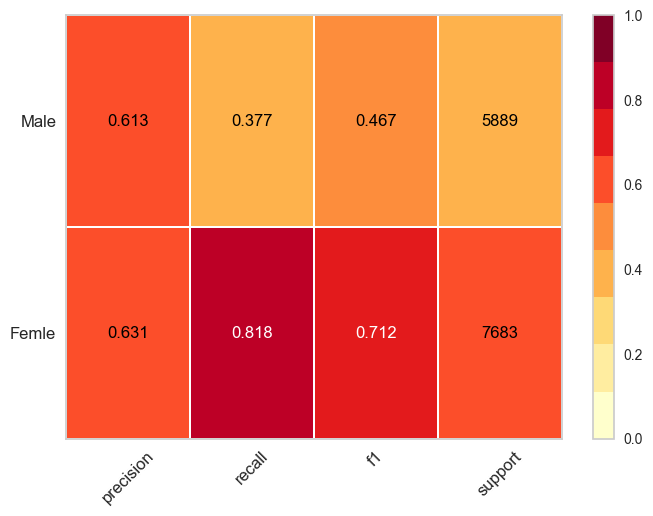

In [269]:
visualizer_Plot= Pipeline(steps=[('preprocessor', preprocessor),
                              ('melbourne_model', visualizer)# or ('melbourne_model', RandomForestRegressor(random_state=0,n_estimators=50)) 
                             ])
visualizer_Plot.fit(xtrain, ytrain)        # Fit the visualizer and the model
visualizer_Plot.score(xtest, ytest)        # Evaluate the model on the test data
visualizer_Plot.show()

In [270]:
fpr, tpr, thresholds = roc_curve(ytest, model.predict(xtest))  #false positive rate,true positive rate
fpr, tpr, thresholds

(array([0.        , 0.18274112, 1.        ]),
 array([0.        , 0.37748344, 1.        ]),
 array([inf,  1.,  0.]))

In [271]:
auc = roc_auc_score(ytest, model.predict(xtest))
print('AUC: %.3f' % auc)

AUC: 0.597


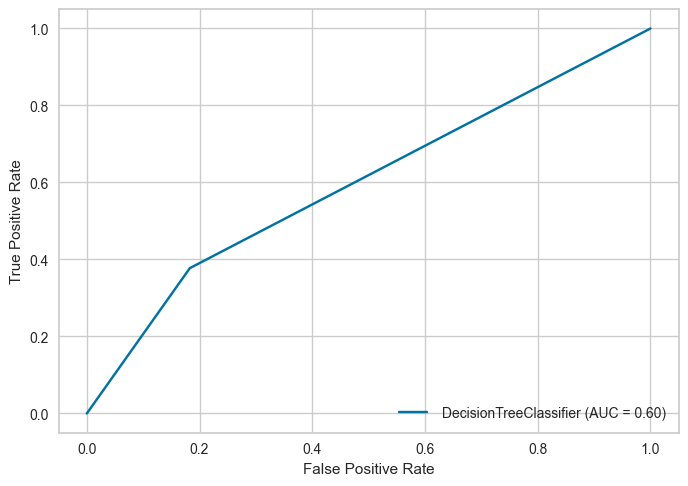

In [272]:
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc,estimator_name=' DecisionTreeClassifier').plot()

In [325]:
import plotclassification ,plotly
import matplotlib.pyplot as plt


# initialize parameters value
plot=plotclassification.plot(y=ytest,
	         y_predict_proba=model.predict_proba(xtest),
	         class_name=["Female","Male"])


In [326]:
plot.class_name
['Femal','male']

['Femal', 'male']

In [340]:
#  confusion matrix plot
plot.plot_confusion_matrix()

In [322]:

plot.plot_classification_report()


In [304]:
# precision recall curve plot
plot.plot_precision_recall_curve()



In [305]:

plot.plot_roc()

# predicted probability histogram plot
#plot_probability_histogram()